In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

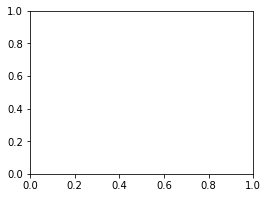

In [5]:
def sine(x, params):
    if np.ndim(params)==1: params = params[None, :]
    return params[:,0]*np.cos(linear(x, params[:,1:]))

def linear(x, params):
    if np.ndim(params)==1: params = params[None, :]
    return params[:,0]*x + params[:,1]

def quadratic(x, params):
    if np.ndim(params)==1: params = params[None, :]
    return params[:,0]*x**2 + linear(x, params[:,1:])

def cubic(x, params):
    if np.ndim(params)==1: params = params[None, :]
    return params[:,0]*x**3 + quadratic(x, params[:,1:])

def make_function_images(func, param_ranges=[(-10,10), (-10,10)], n=4, size=(4,3)):
    # create n graphs of function func with random parameters in the ranges given by params, image size size.
    params = np.random.rand(n, len(param_ranges))
    factors = [ranges[1]-ranges[0] for ranges in param_ranges]
    mins = [ranges[0] for ranges in param_ranges]
    params = params * factors + mins
    x = np.linspace(-1,1,200)
    plt.figure(figsize=size)
    for i in range(n):
#         print(params[i,:])
        plt.plot(x, func(x, params[i,:]))
        # Turn off tick labels
        plt.xticks([])
        plt.yticks([])
        plt.savefig('imgs/'+func.__name__+'/'+str(i)+'.png')
        plt.cla()
    np.savetxt('imgs/'+func.__name__+'params.csv', params)

    
make_function_images(quadratic, [(-10,10), (-10,10), (-10,10), (-10,10)], n=1000)
    


In [ ]:
imgs = function_image(funcs = ['sine','linear','quadratic','cubic'], n=10, size=(100,100))